In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from tensorflow.keras.optimizers import RMSprop
import math
from sklearn.metrics import mean_squared_error

In [ ]:
# Some functions to help out with
def plot_predictions(test,predicted):
    plt.plot(test, color='red',label='Real IBM Stock Price')
    plt.plot(predicted, color='blue',label='Predicted IBM Stock Price')
    plt.title('IBM Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('IBM Stock Price')
    plt.legend()
    plt.show()

def return_rmse(test,predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))

In [ ]:
Dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset/IBM_2006-01-01_to_2018-01-01.csv', index_col='Date', parse_dates=['Date'])
Dataset.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,82.45,82.55,80.81,82.06,11715200,IBM
2006-01-04,82.20,82.50,81.33,81.95,9840600,IBM
2006-01-05,81.40,82.90,81.00,82.50,7213500,IBM
2006-01-06,83.95,85.03,83.41,84.95,8197400,IBM
2006-01-09,84.10,84.25,83.38,83.73,6858200,IBM


In [ ]:
# Checking for missing values
training_set = Dataset['2016'].iloc[:,1:2].values
test_set = Dataset['2017-01-01' : '2017-07-05':].iloc[:,1:2].values

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  


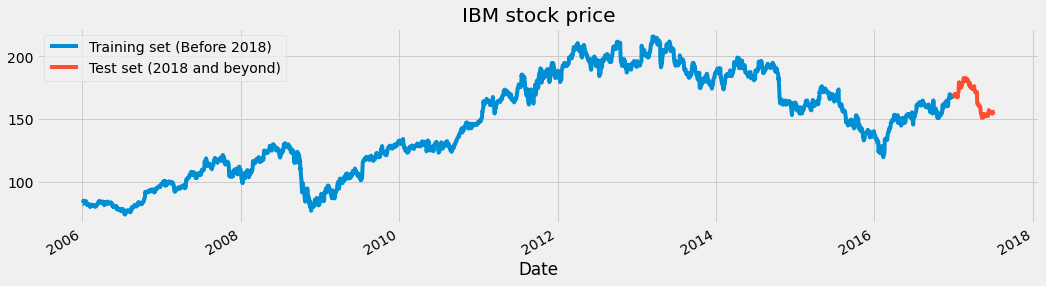

In [ ]:
# We have chosen 'High' attribute for prices. Let's see what it looks like
Dataset["High"][:'2016'].plot(figsize=(16,4),legend=True)
Dataset["High"]['2017-01-01' : '2017-07-05':].plot(figsize=(16,4),legend=True)
plt.legend(['Training set (Before 2018)','Test set (2018 and beyond)'])
plt.title('IBM stock price')
plt.show()

In [ ]:
# Scaling the training set
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [ ]:
X_train = []
y_train = []
for i in range(60,2897):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

IndexError: ignored

In [ ]:
# Reshaping X_train for efficient modelling
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

In [ ]:
# The LSTM architecture
regressor = Sequential()
# First LSTM layer with Dropout regularisation
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))
# Second LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
# Third LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
# Fourth LSTM layer
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))
# The output layer
regressor.add(Dense(units=1))

# Compiling the RNN
regressor.compile(optimizer='rmsprop',loss='mean_squared_error')
# Fitting to the training set
regressor.fit(X_train,y_train,epochs=50,batch_size=32)

Epoch 1/50
93/93 [==============================] - 19s 118ms/step - loss: 0.0222
Epoch 2/50
93/93 [==============================] - 11s 117ms/step - loss: 0.0108
Epoch 3/50
93/93 [==============================] - 11s 119ms/step - loss: 0.0082
Epoch 4/50
93/93 [==============================] - 11s 119ms/step - loss: 0.0066
Epoch 5/50
93/93 [==============================] - 11s 118ms/step - loss: 0.0062
Epoch 6/50
93/93 [==============================] - 11s 118ms/step - loss: 0.0054
Epoch 7/50
93/93 [==============================] - 11s 120ms/step - loss: 0.0044
Epoch 8/50
93/93 [==============================] - 11s 120ms/step - loss: 0.0042
Epoch 9/50
93/93 [==============================] - 11s 120ms/step - loss: 0.0038
Epoch 10/50
93/93 [==============================] - 11s 120ms/step - loss: 0.0036
Epoch 11/50
93/93 [==============================] - 11s 121ms/step - loss: 0.0034
Epoch 12/50
93/93 [==============================] - 11s 119ms/step - loss: 0.0032
Epoch 13/50
9

In [ ]:
# Now to get the test set ready in a similar way as the training set.
# The following has been done so forst 60 entires of test set have 60 previous values which is impossible to get unless we take the whole 
# 'High' attribute data for processing
dataset_total = pd.concat((Dataset["High"][:'2017'],Dataset["High"]['2018':]),axis=0)
inputs = dataset_total[len(dataset_total)-len(test_set) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = sc.transform(inputs)

In [ ]:
# Preparing X_test and predicting the prices
X_test = []
for i in range(60,311):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """


IndexError: ignored

In [ ]:
plot_predictions(test_set,predicted_stock_price)

NameError: ignored

In [ ]:
return_rmse(test_set,predicted_stock_price)